<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_5_Low-pass-filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5: Low-pass filters

In the previous tutorial, you applied high-pass filters to sharpen an image or to find its edges. This time, Low-pass filters will let you smooth the image so that its high frequency elements are minimised. In this tutorial, you'll apply in code the theory explained in the video "3.1 Low-pass filters." You will mainly work with noised images because they entail challenges when it comes about image enhancing. 

## Import the libraries


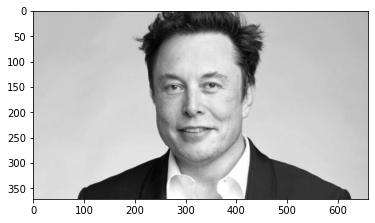

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('elon.jpg')

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")

## Adding noise

There are numerous reasons that can cause noise in an image, and dealing with noise is a quite common preprocessing step. Therefore, we will add it to the image and continue this tutorial with a noised image.



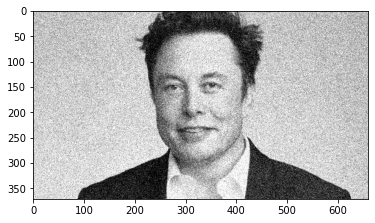

In [ ]:
# scikit-image is part of the well-known machine learning library Scikit-learn, 
# which includes multiple machine learning functions. Specifically, Scikit-image
# is a collection of algorithms for image processing. It is available free of charge and 
# free of restriction. When using one of its functions, you should investigate if its 
# performance/efficiency is better than the implementations in opencv, numpy or other libraries. 

from skimage.util import random_noise

# Adding gaussian noise in the image with scikit-learn
# parameters: an image, type of noise (options: "gaussian", "pepper", "s&p"), 
# Variance of random distribution
noise_img = random_noise(gray, mode='gaussian',var=0.02)
plt.imshow(noise_img, cmap="gray")

## Mean filter

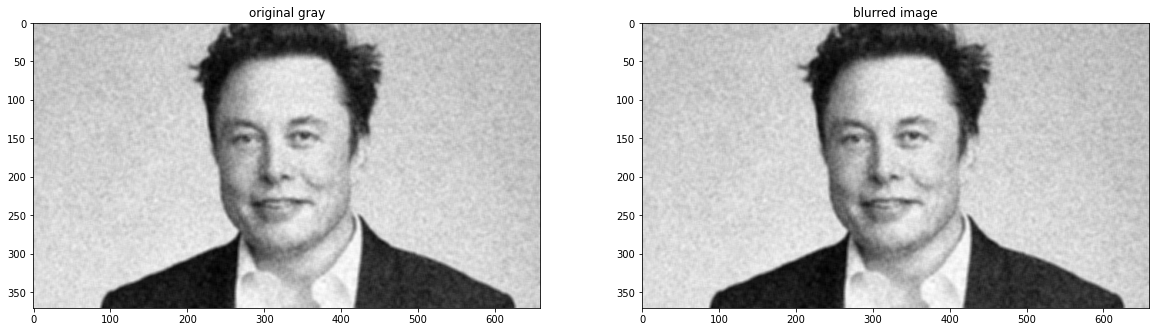

In [ ]:
copy = np.copy(noise_img)

# creates the kernel 
num_rows, num_cols = 5 , 5
total = num_rows*num_cols
kernel = np.ones((num_rows,num_cols),np.float32)/total

# convolves the image with the kernel
mean = cv2.filter2D(copy, -1, kernel)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(mean, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(mean, cmap='gray')

# Median Filtering

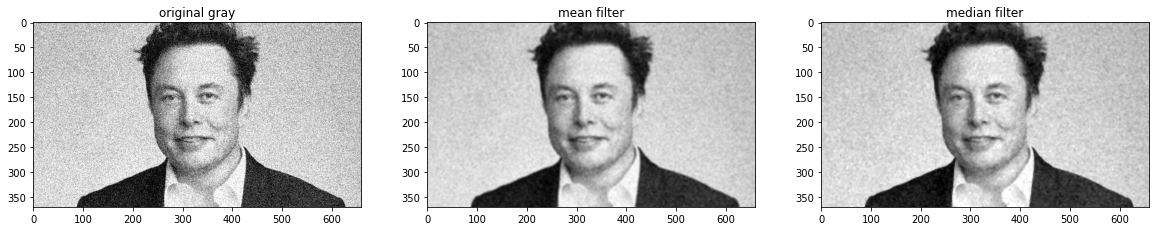

In [ ]:
copy2 = np.copy(noise_img)

# applies median filter
# parameters: image, size of the kernel
median = cv2.medianBlur(np.float32(copy2),5)

# show and compare the resutls
f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(noise_img, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(mean, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

# Gaussian 

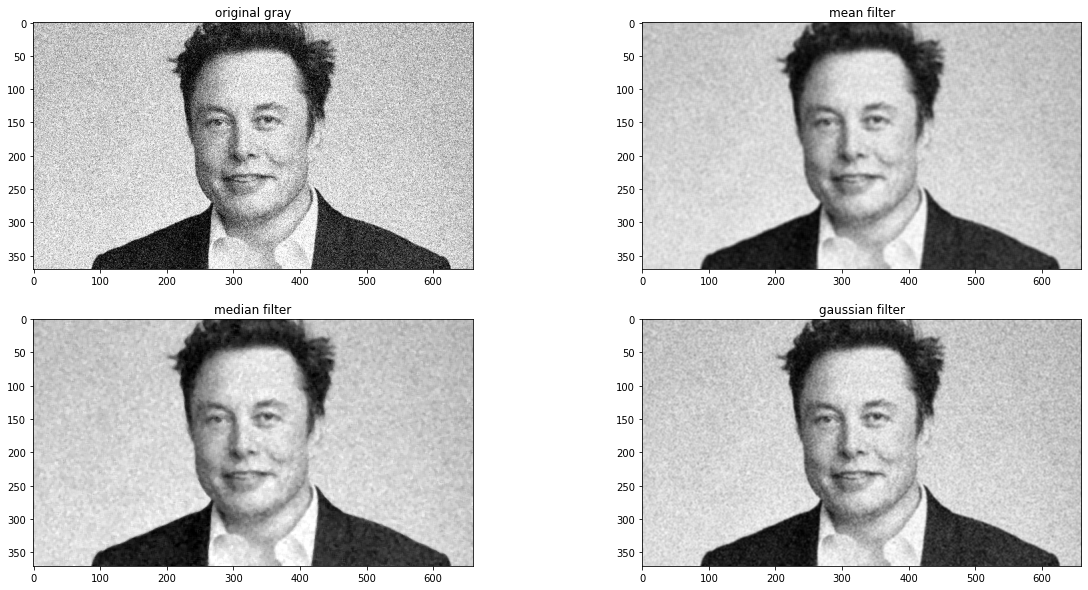

In [ ]:
copy3 = np.copy(noise_img)

# applies gaussian blur with standar deviation  = 0 
kernel_size = 5
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian = cv2.GaussianBlur(copy3,(kernel_size,kernel_size),0,0)

# shows the results
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2 , 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(noise_img, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(mean, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

ax4.set_title('gaussian filter')
ax4.imshow(gaussian, cmap='gray')

# Bilateral Filtering

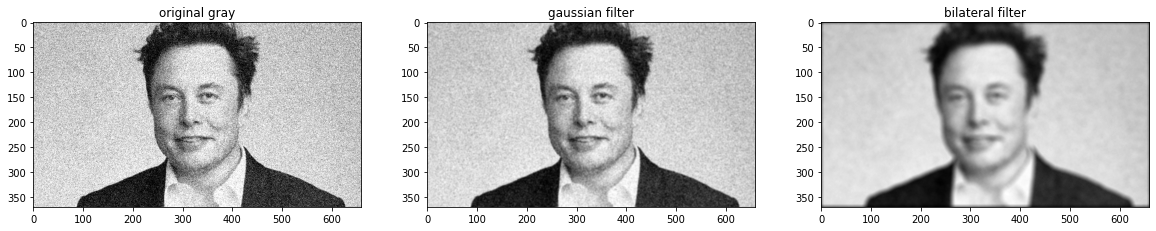

In [ ]:
copy4 = np.copy(noise_img)

# applies bilateral filtering 
# parameters: image in float32 format, kernel size, sigmaColor for intensity gaussian,
# sigmaSpace for coordinates gaussian, border type used to extrapolate pixels 
# outside of the image. See https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/enum_cv_BorderTypes.html
# for more details
bilateral = cv2.bilateralFilter(np.float32(copy4),15,75,75, borderType=cv2.BORDER_CONSTANT)

f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(copy4, cmap='gray')

ax2.set_title('gaussian filter')
ax2.imshow(gaussian, cmap='gray')

ax3.set_title('bilateral filter')
ax3.imshow(bilateral, cmap='gray')

# Exercise 1: 

- Run the tutorial with a different image , add a different noise, and change the parameters (kernel sizes or standard deviations). Then, describe what changes you had to make to enhance better your noised image. Which filter performed better and why? 

(2160, 3840)


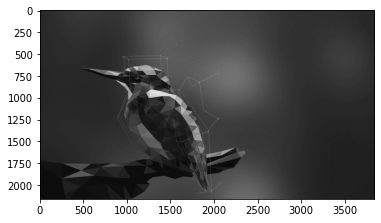

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('bird.jpg')

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.imshow(gray, cmap="gray")

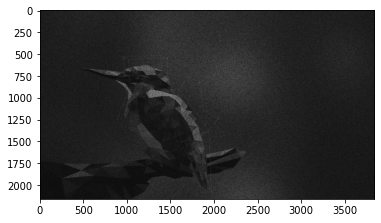

In [ ]:
from skimage.util import random_noise


noise_img1 = random_noise(gray, mode='gaussian',var=0.3)
noise_img2 = random_noise(gray, mode='s&p',amount=0.3)
noise_img3 = random_noise(gray, mode='pepper',amount=0.5)

noise_img = noise_img3

plt.imshow(noise_img, cmap="gray")

Mean Filter
------


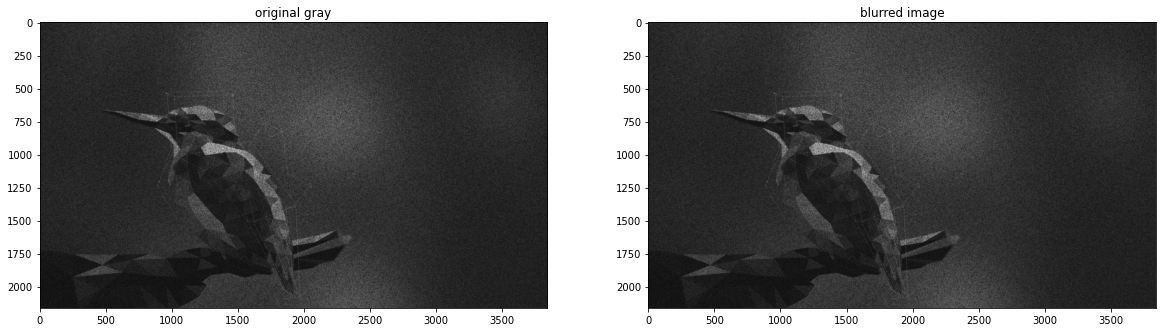

In [ ]:
copy = np.copy(noise_img)

# creates the kernel 
num_rows, num_cols = 5 , 5
total = num_rows*num_cols
kernel = np.ones((num_rows,num_cols),np.float32)/total

# convolves the image with the kernel
mean = cv2.filter2D(copy, -1, kernel)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(mean, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(mean, cmap='gray')

Median Filtering
------------


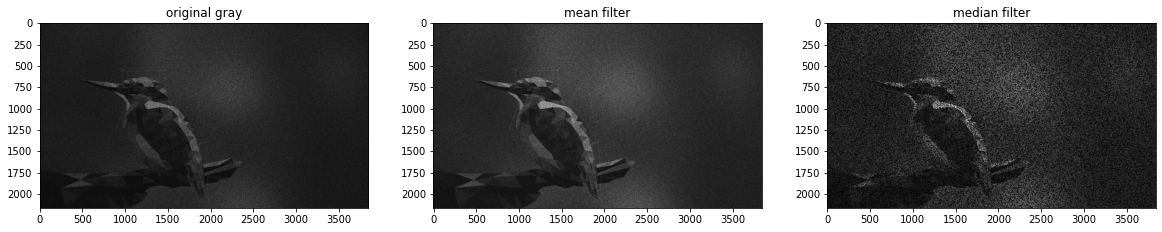

In [ ]:
copy2 = np.copy(noise_img)

# applies median filter
# parameters: image, size of the kernel
median = cv2.medianBlur(np.float32(copy2),5)

# show and compare the resutls
f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(noise_img, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(mean, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

Gaussian Filter
---------------

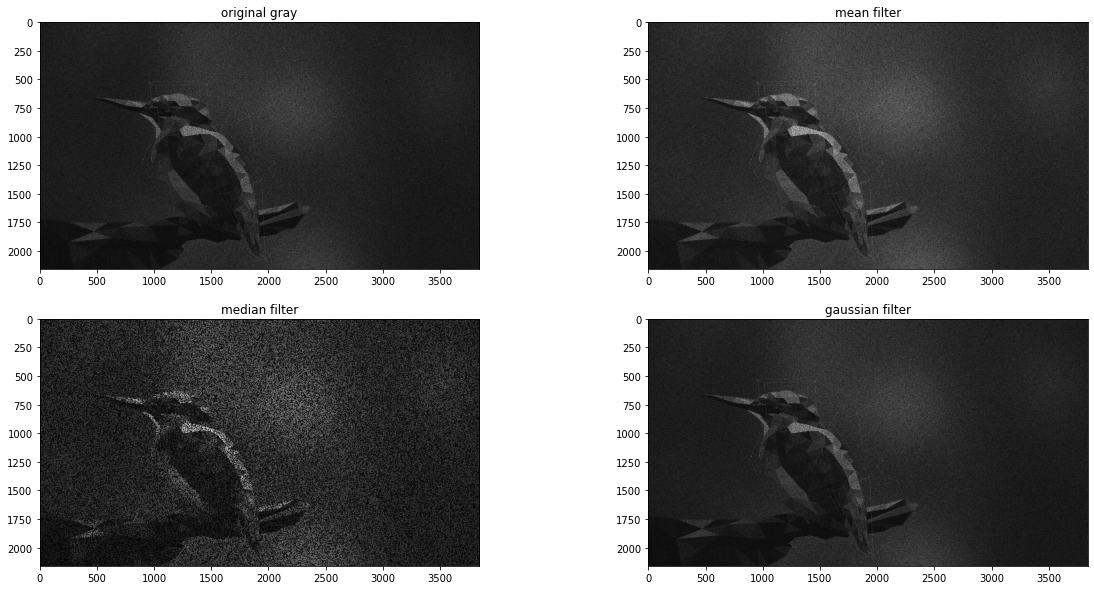

In [ ]:
copy3 = np.copy(noise_img)

# applies gaussian blur with standar deviation  = 0 
kernel_size = 15
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian = cv2.GaussianBlur(copy3,(kernel_size,kernel_size),0.3,0.5)

# shows the results
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2 , 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(noise_img, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(mean, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

ax4.set_title('gaussian filter')
ax4.imshow(gaussian, cmap='gray')

  Bilateral Filtering 
  ---------

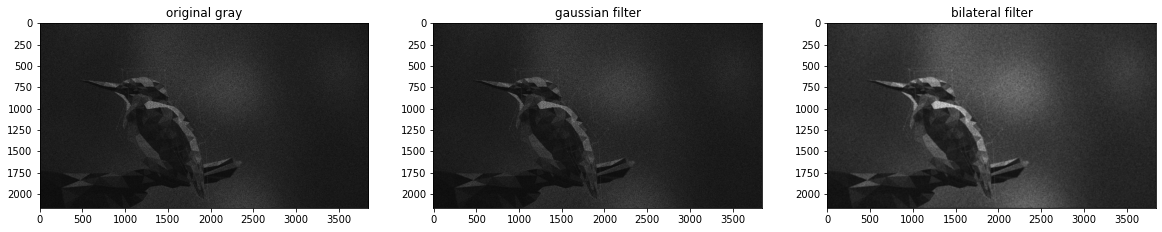

In [ ]:
copy4 = np.copy(noise_img)

# applies bilateral filtering 
# parameters: image in float32 format, kernel size, sigmaColor for intensity gaussian,
# sigmaSpace for coordinates gaussian, border type used to extrapolate pixels 
# outside of the image. See https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/enum_cv_BorderTypes.html
# for more details

bilateral = cv2.bilateralFilter(np.float32(copy4),15,125,125, borderType=cv2.BORDER_ISOLATED)

f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(copy4, cmap='gray')

ax2.set_title('gaussian filter')
ax2.imshow(gaussian, cmap='gray')

ax3.set_title('bilateral filter')
ax3.imshow(bilateral, cmap='gray')

Conclutions for this part:
-------------------------
When we added a Gaussian Noise, we came to the conclusion that mean filter is the best solution for this kind of noise with some contrast stretching while filters like Median and Gaussian don´t work so well in comparison to mean filter.
In the case of adding a S&P Noise, we compared the same 3 filters (Mean, Median and Gaussian) with the difference that median filter had the best results for this noise.
Finally, when we added a Pepper Noise, Gaussian filter was the one with the best results.

----------------------------




## Exercise 2: 

- A doctor diagnosed a patient with a benign tumour but the patient needed urgent surgery to prevent any worse situation. Later, the surgery was completed successfully and the patient was asked to take Computerized Tomography exams every month. The first exam was alright but, sadly, the image analysis equipment was broken, and the maintenance provider scheduled a technician in the next two weeks. 

Can you give them a hand? 
Clean the image and detect the edges. In the end, you should get one separated image with the previous exam and another image with the last exam. Both images must be binarized and only with borders. 

You don't need to diagnose the image yet(meaning identify if the patient has improved), but you can give it a try guessing the needed steps to detect automatically if the patient has improved. 

(369, 632)


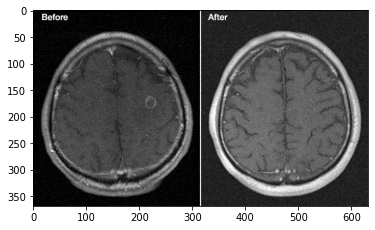

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = cv2.imread('CT benign tumor.png')

# Convert to grayscale for filtering
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.imshow(gray, cmap="gray")

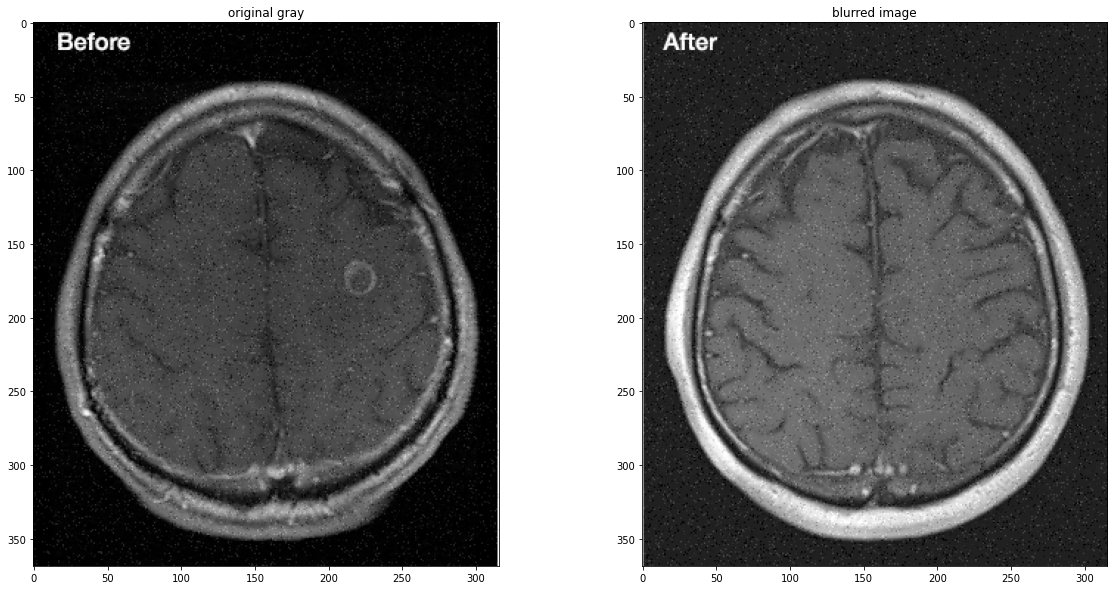

In [ ]:
before = gray[0:369,0:316]
after = gray[0:369,316:632]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(before, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(after, cmap='gray')

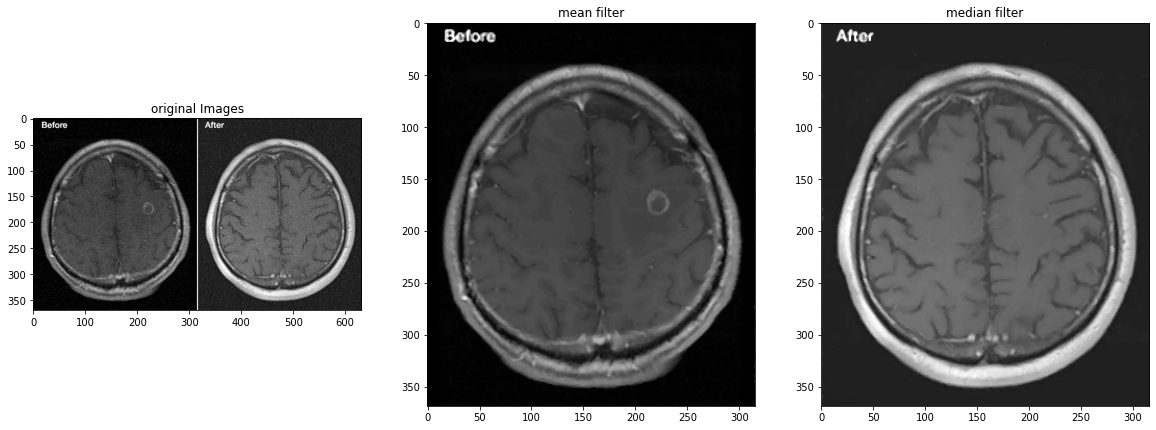

In [ ]:
aux1 = np.copy(before)
aux2 = np.copy(after)


median1 = cv2.medianBlur(np.float32(aux1),3)
median2 = cv2.medianBlur(np.float32(aux2),3)


# show and compare the resutls
f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original Images')
ax1.imshow(gray, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(median1, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median2, cmap='gray')

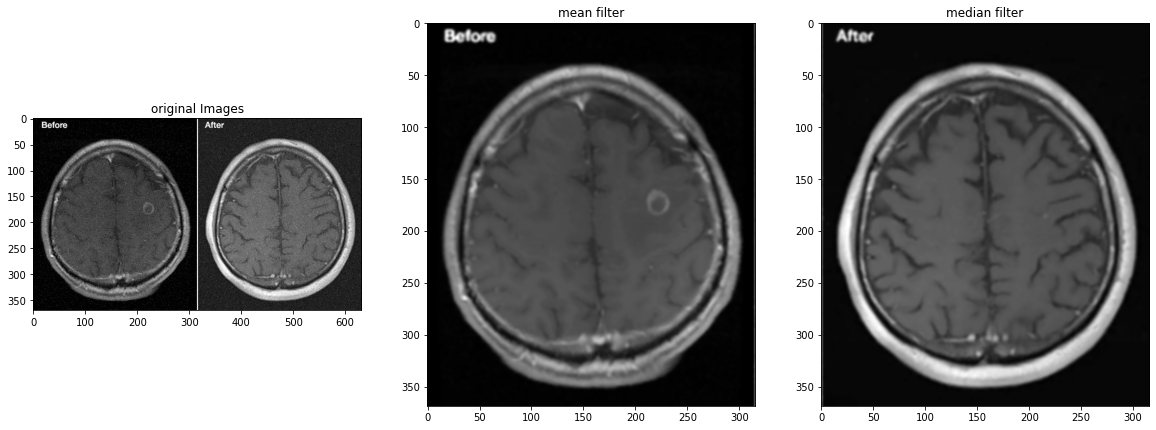

In [ ]:
# High Pass filter
kernel_size = 5

filtered1 = cv2.GaussianBlur(median1,(kernel_size,kernel_size),0,0)
filtered2 = cv2.GaussianBlur(median2,(kernel_size,kernel_size),0,0)

f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))
ax1.set_title('original Images')
ax1.imshow(gray, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(filtered1, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(filtered2, cmap='gray')